🧨 Import Libraries

In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


![Alt text](Perceptrons.jpeg)


🧨 Algorithm implementation

In [25]:
class Perceptron:
    def __init__(self, activation= "unit_step", epoch = 1000, learning_rate = .01,gradient = True):
        self.activation = activation
        self.epoch = epoch
        self.learning_rate = learning_rate
        self.gradient = gradient
        self.weights = None
        self.bias = 0
        
    def _unit_step(self, z):
        return np.where(z >=0, 1, 0)
    
    def _relu(self, z):
        return np.maximum(0, z)
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _gradient_descent(self, X,y):
        if self.activation == "sigmoid":
            for _ in range(self.epoch):
                y_hat = self.predict(X)
                error = y - y_hat
                self.weights += self.learning_rate * self.n_samples/2 * X.T.dot(error * y_hat * (1-y_hat))
                self.bias += self.learning_rate * self.n_samples/2 * np.sum(error * y_hat * (1-y_hat))
        elif self.activation == "relu":
            for _ in range(self.epoch):
                y_hat = self.predict(X)
                error = y - y_hat
                self.weights += self.learning_rate  * X.T.dot(error * (y_hat > 0))
                self.bias += self.learning_rate * np.sum(error * (y_hat > 0))
        else:
            raise ValueError("only sigmoid and relu can use gradient descnet")
                     
        
    def _perceptron_update_rule(self, X,y):
        for _ in range(self.epoch):
            y_hat = self.predict(X)
            error = y - y_hat
            self.weights += self.learning_rate * X.T.dot(error)
            self.bias += self.learning_rate * np.sum(error)
    
    def fit(self, X,y):
        y = y.reshape(-1,1)
        self.n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features, 1)
        if self.gradient:
            self._gradient_descent(X,y)
        else:
            self._perceptron_update_rule(X,y)
            
            
    def predict(self, X):
        z = X.dot(self.weights) + self.bias
        
        if self.activation == "sigmoid":
            y_hat = self._sigmoid(z)
        elif self.activation == "relu":
            y_hat = self._relu(z)
        elif self.activation == "unit_step":
            y_hat = self._unit_step(z)
        else:
            raise ValueError("only Sigmoid, relu and unit_step are supported")
        return y_hat
        

✨ Load Data 

In [26]:
df= pd.read_csv ("data.csv" ) 
df

,x1,x2,y
0,0.374540,0.950714,1
1,0.731994,0.598658,1
2,0.156019,0.155995,0
3,0.058084,0.866176,0
4,0.601115,0.708073,1
...,...,...,...
95,0.093103,0.897216,0
96,0.900418,0.633101,1
97,0.339030,0.349210,0
98,0.725956,0.897110,1


✨ Split data (X,y)

In [27]:
X = df.drop("y" , axis =1 ).values    # as numpy array not as data_frame
y = df['y'].values 

✨ Visualization

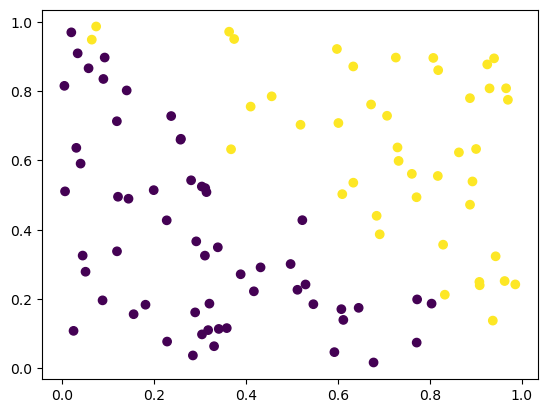

In [28]:
plt.scatter(X[:,0] ,X[:,1] , c = y)


✨ Train Model 

In [29]:
model = Perceptron(activation="unit_step" ,epoch = 1000 , learning_rate=.01 , gradient=False)
model.fit(X,y)

✨ Plot decision boundry


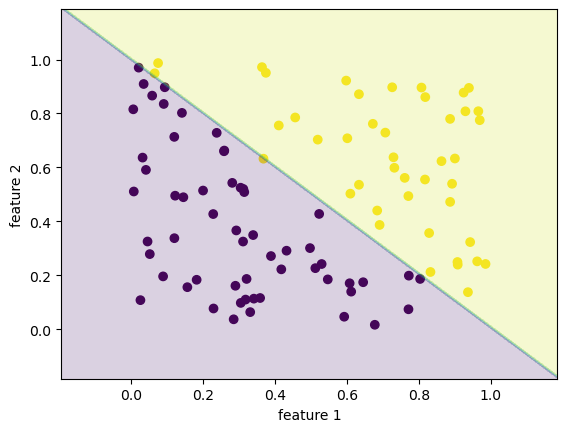

In [30]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.xlabel("feature 1")
plt.ylabel("feature 2")

x_min, x_max = X[:,0].min() - .2, X[:, 0].max()+.2  # range
y_min, y_max = X[:,1].min()-.2, X[:,1].max()+.2

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100), np.linspace(y_min,y_max,100))   #generate numbers

z = model.predict(np.c_[xx.flatten(), yy.ravel()])   # flatten , ravel (to be 1d array ) to predict
z = z.reshape(xx.shape) # return shape to plot 

plt.contourf(xx,yy, z, alpha = .2) # plot

✨ Built in model  

In [31]:
from sklearn.linear_model import Perceptron
model = Perceptron()
model.fit(X,y)

Perceptron()

✨ Plot decision boundry


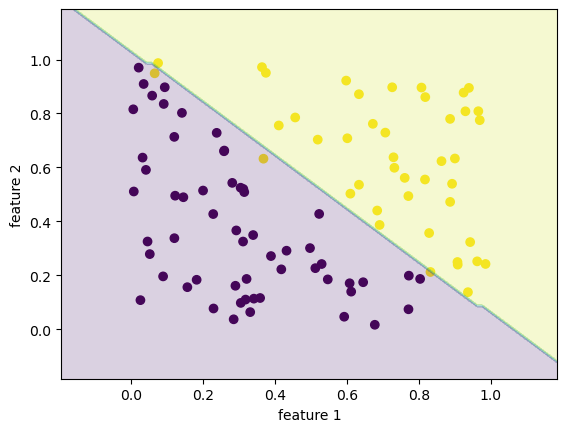

In [32]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.xlabel("feature 1")
plt.ylabel("feature 2")

x_min, x_max = X[:,0].min() - .2, X[:, 0].max()+.2
y_min, y_max = X[:,1].min()-.2, X[:,1].max()+.2

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100), np.linspace(y_min,y_max,100))

z = model.predict(np.c_[xx.flatten(), yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx,yy, z, alpha = .2)

Thanks 💙